In [1]:
import sys

sys.path.append("./../../src")


from utils import collate_fn
from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader

In [2]:
train_dataset = SpeechCommandsDataset("./../../data/train")

train_loader = DataLoader(
    train_dataset, batch_size=40, shuffle=True, collate_fn=collate_fn
)

for batch in train_loader:
    waveforms, labels = batch
    for i, waveform in enumerate(waveforms):
        print(f"Waveform {i} shape: {waveform.shape}")
    print(labels)
    break

Waveform 0 shape: torch.Size([1, 16000])
Waveform 1 shape: torch.Size([1, 16000])
Waveform 2 shape: torch.Size([1, 16000])
Waveform 3 shape: torch.Size([1, 16000])
Waveform 4 shape: torch.Size([1, 16000])
Waveform 5 shape: torch.Size([1, 16000])
Waveform 6 shape: torch.Size([1, 16000])
Waveform 7 shape: torch.Size([1, 16000])
Waveform 8 shape: torch.Size([1, 16000])
Waveform 9 shape: torch.Size([1, 16000])
Waveform 10 shape: torch.Size([1, 16000])
Waveform 11 shape: torch.Size([1, 16000])
Waveform 12 shape: torch.Size([1, 16000])
Waveform 13 shape: torch.Size([1, 16000])
Waveform 14 shape: torch.Size([1, 16000])
Waveform 15 shape: torch.Size([1, 16000])
Waveform 16 shape: torch.Size([1, 16000])
Waveform 17 shape: torch.Size([1, 16000])
Waveform 18 shape: torch.Size([1, 16000])
Waveform 19 shape: torch.Size([1, 16000])
Waveform 20 shape: torch.Size([1, 16000])
Waveform 21 shape: torch.Size([1, 16000])
Waveform 22 shape: torch.Size([1, 16000])
Waveform 23 shape: torch.Size([1, 16000])
Wa

In [ ]:
from IPython.display import Audio


waveform = waveforms[0]
sr = 16000

Audio(waveform.squeeze().numpy(), rate=sr)

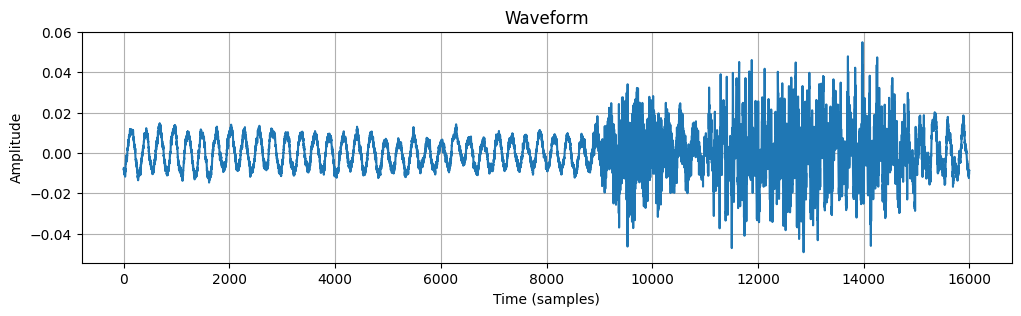

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(waveform.squeeze().numpy())
plt.title("Waveform")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()